In [1]:
#''''''''''''''''''''''''''''''''''''''''''''
# Vandit Jyotindra Gajjar
# ID: a1779153
# Introduction-to-Statistical-Machine-Learning
# Assignment: 1
#''''''''''''''''''''''''''''''''''''''''''''

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importing useful libraries and modules 

import os
import pandas as pd
import numpy as np
import random
import math as m
import matplotlib.pyplot as plt
import cvxopt
import cvxopt.solvers
from cvxopt import matrix
from cvxopt import solvers
from numpy import array
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(40)

In [4]:
# Reading the files and converting to necessary labels -1 and 1

X_train, Y_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/train.csv', header=None), pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/test.csv', header=None)
X_data_train, X_data_val = X_train.iloc[:7225,1:].to_numpy(), X_train.iloc[7225:,1:].to_numpy()
y_label_train, y_label_val  = X_train.iloc[:7225,0].to_numpy(), X_train.iloc[7225:,0].to_numpy()
Y, y = Y_test.iloc[:,1:].to_numpy(), Y_test.iloc[:,0].to_numpy()
y_label_train, y_label_val, y = np.where(y_label_train == 0, -1, y_label_train), np.where(y_label_val == 0, -1, y_label_val), np.where(y == 0, -1, y)

In [5]:
# SVM Primal Form - training function

def svm_train_primal(data_train, label_train, regularisation_para_C):
    a, b = data_train.shape
    P_w,  P_s, P_b = np.asarray(np.diag(np.ones(b))), np.zeros([b, a]),  np.zeros([1, b]) 
    
    P_1, P_2, P_3, P_4 = np.zeros([a, a]), np.zeros([a, 1]), np.zeros([1, a]), np.zeros([1, 1]) 
    P = cvxopt.matrix(np.concatenate((np.concatenate((P_w, P_s, P_b.T), axis = 1), np.concatenate((P_s.T, P_1, P_2), axis=1), np.concatenate((P_b, P_3, P_4),axis = 1)), axis = 0))

    q = cvxopt.matrix((np.concatenate((P_b, np.matrix(np.ones([a]) * regularisation_para_C/a), P_4), axis=1).T))
    
    g_1, g_2, g_3 = np.dot(np.diag(label_train), data_train) * (-1), np.asarray(np.diag(np.ones([a]) * (-1))),  np.matrix(label_train) * (-1)
    g_3 = g_3.T

    G = np.vstack((np.concatenate((g_1,g_2,g_3), axis = 1), np.concatenate((np.zeros([a, b + 1]), np.asarray(np.diag(np.ones([a]) * (-1)))), axis = 1)))
    G = cvxopt.matrix(G) 

    h = cvxopt.matrix(np.hstack((np.ones(a) * (-1), np.zeros(a))))             
    svm_model = np.array(cvxopt.solvers.coneqp(P,q,G,h)['x']).flatten()
    return svm_model

In [6]:
# SVM Primal Form - testing function

def svm_predict_primal(data_test, label_test, svm_model):
    a, b = X_data_train.shape
    accuracy = accuracy_score(label_test, np.sign(np.dot(data_test, svm_model[:b]) + svm_model[-1]))
    return accuracy

In [7]:
regularisation_para_C = [1] + list(range(0, 101, 5))

for k in regularisation_para_C:
    svm_model = svm_train_primal(X_data_train , y_label_train , k)
    test_accuracy_primal = svm_predict_primal(X_data_val , y_label_val, svm_model)
    print('The training accuracy for C = ', k, ' is: ', test_accuracy_primal)

     pcost       dcost       gap    pres   dres
 0:  1.4536e-01  7.0638e+02  7e+04  3e+00  5e+04
 1:  2.3663e+00 -7.5904e+02  8e+02  3e-02  5e+02
 2:  2.3706e+00 -1.3948e+01  2e+01  6e-04  9e+00
 3:  1.8408e+00 -1.4758e+00  3e+00  9e-05  1e+00
 4:  5.7589e-01  1.4409e-01  4e-01  1e-15  5e-16
 5:  3.0843e-01  1.9881e-01  1e-01  8e-16  3e-16
 6:  2.6898e-01  2.2351e-01  5e-02  7e-16  5e-16
 7:  2.5221e-01  2.3446e-01  2e-02  6e-16  2e-15
 8:  2.4674e-01  2.3821e-01  9e-03  6e-16  1e-15
 9:  2.4324e-01  2.4068e-01  3e-03  6e-16  3e-15
10:  2.4216e-01  2.4148e-01  7e-04  6e-16  1e-15
11:  2.4184e-01  2.4174e-01  1e-04  6e-16  6e-15
12:  2.4179e-01  2.4178e-01  7e-06  7e-16  3e-15
13:  2.4178e-01  2.4178e-01  2e-07  7e-16  2e-14
Optimal solution found.
The training accuracy for C =  1  is:  0.9741176470588235
     pcost       dcost       gap    pres   dres
 0:  4.7743e-02  7.0404e+02  7e+04  3e+00  5e+04
 1:  4.7712e-02 -7.5773e+02  8e+02  3e-02  5e+02
 2:  4.6573e-02 -9.8241e+00  1e+01  4e

In [8]:
svm_model = svm_train_primal(X_data_train , y_label_train , 100)
train_accuracy, val_accuracy, test_accuracy = svm_predict_primal(X_data_train , y_label_train , svm_model), svm_predict_primal(X_data_val , y_label_val , svm_model), svm_predict_primal(Y , y , svm_model)

print("The train accuracy for our train set: ", train_accuracy)
print("The val accuracy for our validation set: ", val_accuracy)
print("The test accuracy for our testing set: ", test_accuracy)

     pcost       dcost       gap    pres   dres
 0:  8.5728e+00  9.3864e+02  7e+04  3e+00  4e+04
 1:  2.2845e+02 -1.2122e+03  1e+03  6e-02  7e+02
 2:  1.6335e+02 -2.1908e+02  4e+02  1e-02  2e+02
 3:  6.1364e+01 -2.1105e+01  8e+01  2e-03  3e+01
 4:  2.2786e+01 -8.9580e-01  2e+01  5e-04  7e+00
 5:  1.3405e+01  3.8420e+00  1e+01  2e-04  2e+00
 6:  9.0630e+00  5.9952e+00  3e+00  4e-05  5e-01
 7:  8.0562e+00  6.5158e+00  2e+00  2e-05  2e-01
 8:  7.5943e+00  6.7526e+00  8e-01  6e-06  8e-02
 9:  7.2602e+00  6.9385e+00  3e-01  1e-06  1e-02
10:  7.1626e+00  7.0042e+00  2e-01  4e-07  5e-03
11:  7.1116e+00  7.0414e+00  7e-02  1e-07  1e-03
12:  7.0897e+00  7.0574e+00  3e-02  2e-08  2e-04
13:  7.0772e+00  7.0684e+00  9e-03  3e-09  3e-05
14:  7.0731e+00  7.0721e+00  9e-04  2e-10  2e-06
15:  7.0726e+00  7.0726e+00  5e-05  8e-12  1e-07
16:  7.0726e+00  7.0726e+00  8e-07  1e-13  2e-09
Optimal solution found.
The train accuracy for our train set:  0.9777162629757785
The val accuracy for our validation s

In [9]:
w_primal, b_primal = svm_model[:X_data_train.shape[1]], svm_model[-1]
primal_W_series, primal_b_series = pd.Series(w_primal), pd.Series(b_primal)
primal_series = pd.concat([primal_W_series, primal_b_series], axis=0)

In [10]:
# SVM Dual Form - training function

def svm_train_dual(data_train,  label_train,  regularisation_para_C):
    a, b = X_data_train.shape
    label_train = label_train.reshape(-1, 1) * 1.
    
    label_train_diagonal = np.asarray(np.diag(np.ones(label_train.shape[0]))*label_train) 
    mat = np.dot(label_train_diagonal, data_train)
    mat.shape

    P, q = matrix(np.dot(mat , mat.T) * 1.), matrix(-np.ones((a, 1)))

    G = matrix(np.vstack((np.eye(a) * (-1), np.eye(a))))
    h = matrix(np.hstack((np.zeros(a), np.ones(a) * regularisation_para_C/a)))
    
    A, b = matrix(label_train.reshape(1, -1)), matrix(np.zeros(1))
    res = solvers.qp(P, q, G, h, A, b)
    w_1 = (label_train * np.array(res['x'])).T @ data_train
    w = w_1.reshape(-1,1)

    svm_model_d = np.vstack((w_1.reshape(-1,1), label_train[(np.array(res['x']) > 1e-4).flatten()] - np.dot(data_train[(np.array(res['x']) > 1e-4).flatten()], w).mean()))
    return svm_model_d

In [11]:
# SVM Dual Form - testing function

def svm_predict_dual(data_test, label_test, svm_model_d):    
    a, b = X_data_train.shape
    accuracy = accuracy_score(label_test, np.sign(np.dot(svm_model_d[:b].T, data_test.T) + svm_model_d[-1]).reshape(label_test.shape))
    return accuracy

In [12]:
regularisation_para_C = [1] + list(range(0, 101, 5))
for k in regularisation_para_C:
    svm_model_dual = svm_train_dual(X_data_train , y_label_train , k)
    test_accuracy_dual = svm_predict_dual(X_data_val , y_label_val , svm_model_dual)
    print('The training accuracy for C = ', k, ' is: ', test_accuracy_dual)

     pcost       dcost       gap    pres   dres
 0: -7.0546e+02 -2.3908e+00  7e+04  3e+02  8e-13
 1: -7.2821e+00 -2.3906e+00  7e+02  3e+00  8e-13
 2: -2.9906e-01 -2.3705e+00  1e+01  4e-02  2e-14
 3: -1.7255e-01 -1.6774e+00  2e+00  4e-03  2e-15
 4: -1.6492e-01 -3.7007e-01  2e-01  1e-04  3e-15
 5: -2.1166e-01 -2.8174e-01  7e-02  4e-05  2e-15
 6: -2.2791e-01 -2.5995e-01  3e-02  2e-05  2e-15
 7: -2.3564e-01 -2.4967e-01  1e-02  6e-06  2e-15
 8: -2.3887e-01 -2.4545e-01  7e-03  2e-06  2e-15
 9: -2.4084e-01 -2.4292e-01  2e-03  6e-07  2e-15
10: -2.4152e-01 -2.4209e-01  6e-04  1e-07  2e-15
11: -2.4174e-01 -2.4183e-01  8e-05  1e-08  2e-15
12: -2.4178e-01 -2.4179e-01  6e-06  8e-10  2e-15
13: -2.4178e-01 -2.4178e-01  2e-07  2e-11  2e-15
Optimal solution found.
The training accuracy for C =  1  is:  0.8494117647058823
     pcost       dcost       gap    pres   dres
 0: -7.0536e+02 -4.7731e-02  7e+04  3e+02  8e-13
 1: -7.1230e+00 -4.7719e-02  7e+02  3e+00  8e-13
 2: -1.3982e-01 -4.6536e-02  9e+00  4e

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


     pcost       dcost       gap    pres   dres
 0: -7.0585e+02 -1.1764e+01  7e+04  3e+02  8e-13
 1: -8.0295e+00 -1.1758e+01  8e+02  3e+00  8e-13
 2: -1.0254e+00 -1.1228e+01  4e+01  1e-01  3e-14
 3: -5.8223e-01 -6.0740e+00  8e+00  1e-02  5e-15
 4: -4.4577e-01 -1.3172e+00  1e+00  1e-03  6e-15
 5: -5.6860e-01 -8.8468e-01  3e-01  4e-04  3e-15
 6: -6.0414e-01 -8.0461e-01  2e-01  2e-04  3e-15
 7: -6.3283e-01 -7.4388e-01  1e-01  9e-05  2e-15
 8: -6.4810e-01 -7.1313e-01  7e-02  5e-05  2e-15
 9: -6.6020e-01 -6.8915e-01  3e-02  9e-06  3e-15
10: -6.6547e-01 -6.8128e-01  2e-02  4e-06  3e-15
11: -6.7035e-01 -6.7426e-01  4e-03  3e-17  3e-15
12: -6.7183e-01 -6.7265e-01  8e-04  3e-17  3e-15
13: -6.7217e-01 -6.7227e-01  1e-04  3e-17  3e-15
14: -6.7222e-01 -6.7222e-01  5e-06  3e-17  3e-15
15: -6.7222e-01 -6.7222e-01  1e-07  1e-17  3e-15
Optimal solution found.
The training accuracy for C =  5  is:  0.8949019607843137
     pcost       dcost       gap    pres   dres
 0: -7.0634e+02 -2.3482e+01  7e+04  3e

In [13]:
svm_model_d = svm_train_dual(X_data_train , y_label_train , 1)
train_accuracy, val_accuracy, test_accuracy = svm_predict_dual(X_data_train , y_label_train , svm_model_d), svm_predict_dual(X_data_val , y_label_val , svm_model_d), svm_predict_dual(Y , y , svm_model_d)

print("The train accuracy for our train set: ", train_accuracy)
print("The val accuracy for our validation set: ", val_accuracy)
print("The test accuracy for our testing set: ", test_accuracy)

     pcost       dcost       gap    pres   dres
 0: -7.0546e+02 -2.3908e+00  7e+04  3e+02  8e-13
 1: -7.2821e+00 -2.3906e+00  7e+02  3e+00  8e-13
 2: -2.9906e-01 -2.3705e+00  1e+01  4e-02  2e-14
 3: -1.7255e-01 -1.6774e+00  2e+00  4e-03  2e-15
 4: -1.6492e-01 -3.7007e-01  2e-01  1e-04  3e-15
 5: -2.1166e-01 -2.8174e-01  7e-02  4e-05  2e-15
 6: -2.2791e-01 -2.5995e-01  3e-02  2e-05  2e-15
 7: -2.3564e-01 -2.4967e-01  1e-02  6e-06  2e-15
 8: -2.3887e-01 -2.4545e-01  7e-03  2e-06  2e-15
 9: -2.4084e-01 -2.4292e-01  2e-03  6e-07  2e-15
10: -2.4152e-01 -2.4209e-01  6e-04  1e-07  2e-15
11: -2.4174e-01 -2.4183e-01  8e-05  1e-08  2e-15
12: -2.4178e-01 -2.4179e-01  6e-06  8e-10  2e-15
13: -2.4178e-01 -2.4178e-01  2e-07  2e-11  2e-15
Optimal solution found.
The train accuracy for our train set:  0.8429065743944637
The val accuracy for our validation set:  0.8494117647058823
The test accuracy for our testing set:  0.8306666666666667


In [14]:
W_dual, b_dual = svm_model_d[:X_data_train.shape[1]], svm_model_d[-1]
dual_W_series, dual_b_series = pd.Series(W_dual.flatten()), pd.Series(b_dual)
dual_series = pd.concat((dual_W_series, dual_b_series), axis=0)

In [15]:
# SVM using Existing Libraries - Scikit-learn 

regularisation_para_C = list(range(1, 101, 5))
regularisation_para_C = [i / X_data_train.shape[0] for i in regularisation_para_C]


for j in regularisation_para_C:
    SVM_classifier = SVC(C = j, kernel = 'linear')
    SVM_classifier.fit(X_data_train, y_label_train) 
    predicted_labels = SVM_classifier.predict(X_data_val)
    accuracy = accuracy_score(y_label_val, predicted_labels)
    print('The Training accuracy for C = ', j*X_data_train.shape[0], ' is: ', accuracy)

The Training accuracy for C =  1.0  is:  0.9741176470588235
The Training accuracy for C =  6.0  is:  0.9749019607843137
The Training accuracy for C =  11.0  is:  0.9772549019607844
The Training accuracy for C =  16.0  is:  0.9756862745098039
The Training accuracy for C =  21.0  is:  0.9749019607843137
The Training accuracy for C =  26.0  is:  0.9741176470588235
The Training accuracy for C =  31.000000000000004  is:  0.971764705882353
The Training accuracy for C =  36.0  is:  0.9725490196078431
The Training accuracy for C =  41.0  is:  0.9709803921568627
The Training accuracy for C =  46.0  is:  0.9701960784313726
The Training accuracy for C =  51.0  is:  0.9701960784313726
The Training accuracy for C =  56.0  is:  0.9709803921568627
The Training accuracy for C =  61.00000000000001  is:  0.9701960784313726
The Training accuracy for C =  66.0  is:  0.9701960784313726
The Training accuracy for C =  71.0  is:  0.9701960784313726
The Training accuracy for C =  76.0  is:  0.9701960784313726


In [16]:
SVM_classifier = SVC(C = 100 / X_data_train.shape[0], kernel = 'linear')
SVM_classifier.fit(X_data_train, y_label_train) 
predicted_labels_train = SVM_classifier.predict(X_data_train)
train_accuracy = accuracy_score(y_label_train, predicted_labels_train)
predicted_labels_test = SVM_classifier.predict(Y)
test_accuracy = accuracy_score(y, predicted_labels_test)
print('The overall training accuracy is : ',train_accuracy)
print('The overall testing accuracy is : ',test_accuracy)

The overall training accuracy is :  0.9777162629757785
The overall testing accuracy is :  0.968


In [17]:
SVC_series = pd.concat((pd.Series(SVM_classifier.coef_.flatten()), pd.Series(SVM_classifier.intercept_)), axis=0)

In [18]:
parameter_comparison = pd.concat([dual_series.rename('SVM Dual Form'), primal_series.rename('SVM Primal Form')], axis=1)
parameter_difference = round((parameter_comparison['SVM Primal Form'] - parameter_comparison['SVM Dual Form']), 4)
parameter_difference_percentage = (parameter_comparison['SVM Primal Form'] - parameter_comparison['SVM Dual Form'])/parameter_comparison['SVM Dual Form']*100
final_parameter_comparison = pd.concat([parameter_comparison, parameter_difference, parameter_difference_percentage], axis=1)
weights_comparison = final_parameter_comparison.iloc[:200]

Text(0.5, 1.0, 'Comparision of Weights and Bias for Primal and Dual Form')

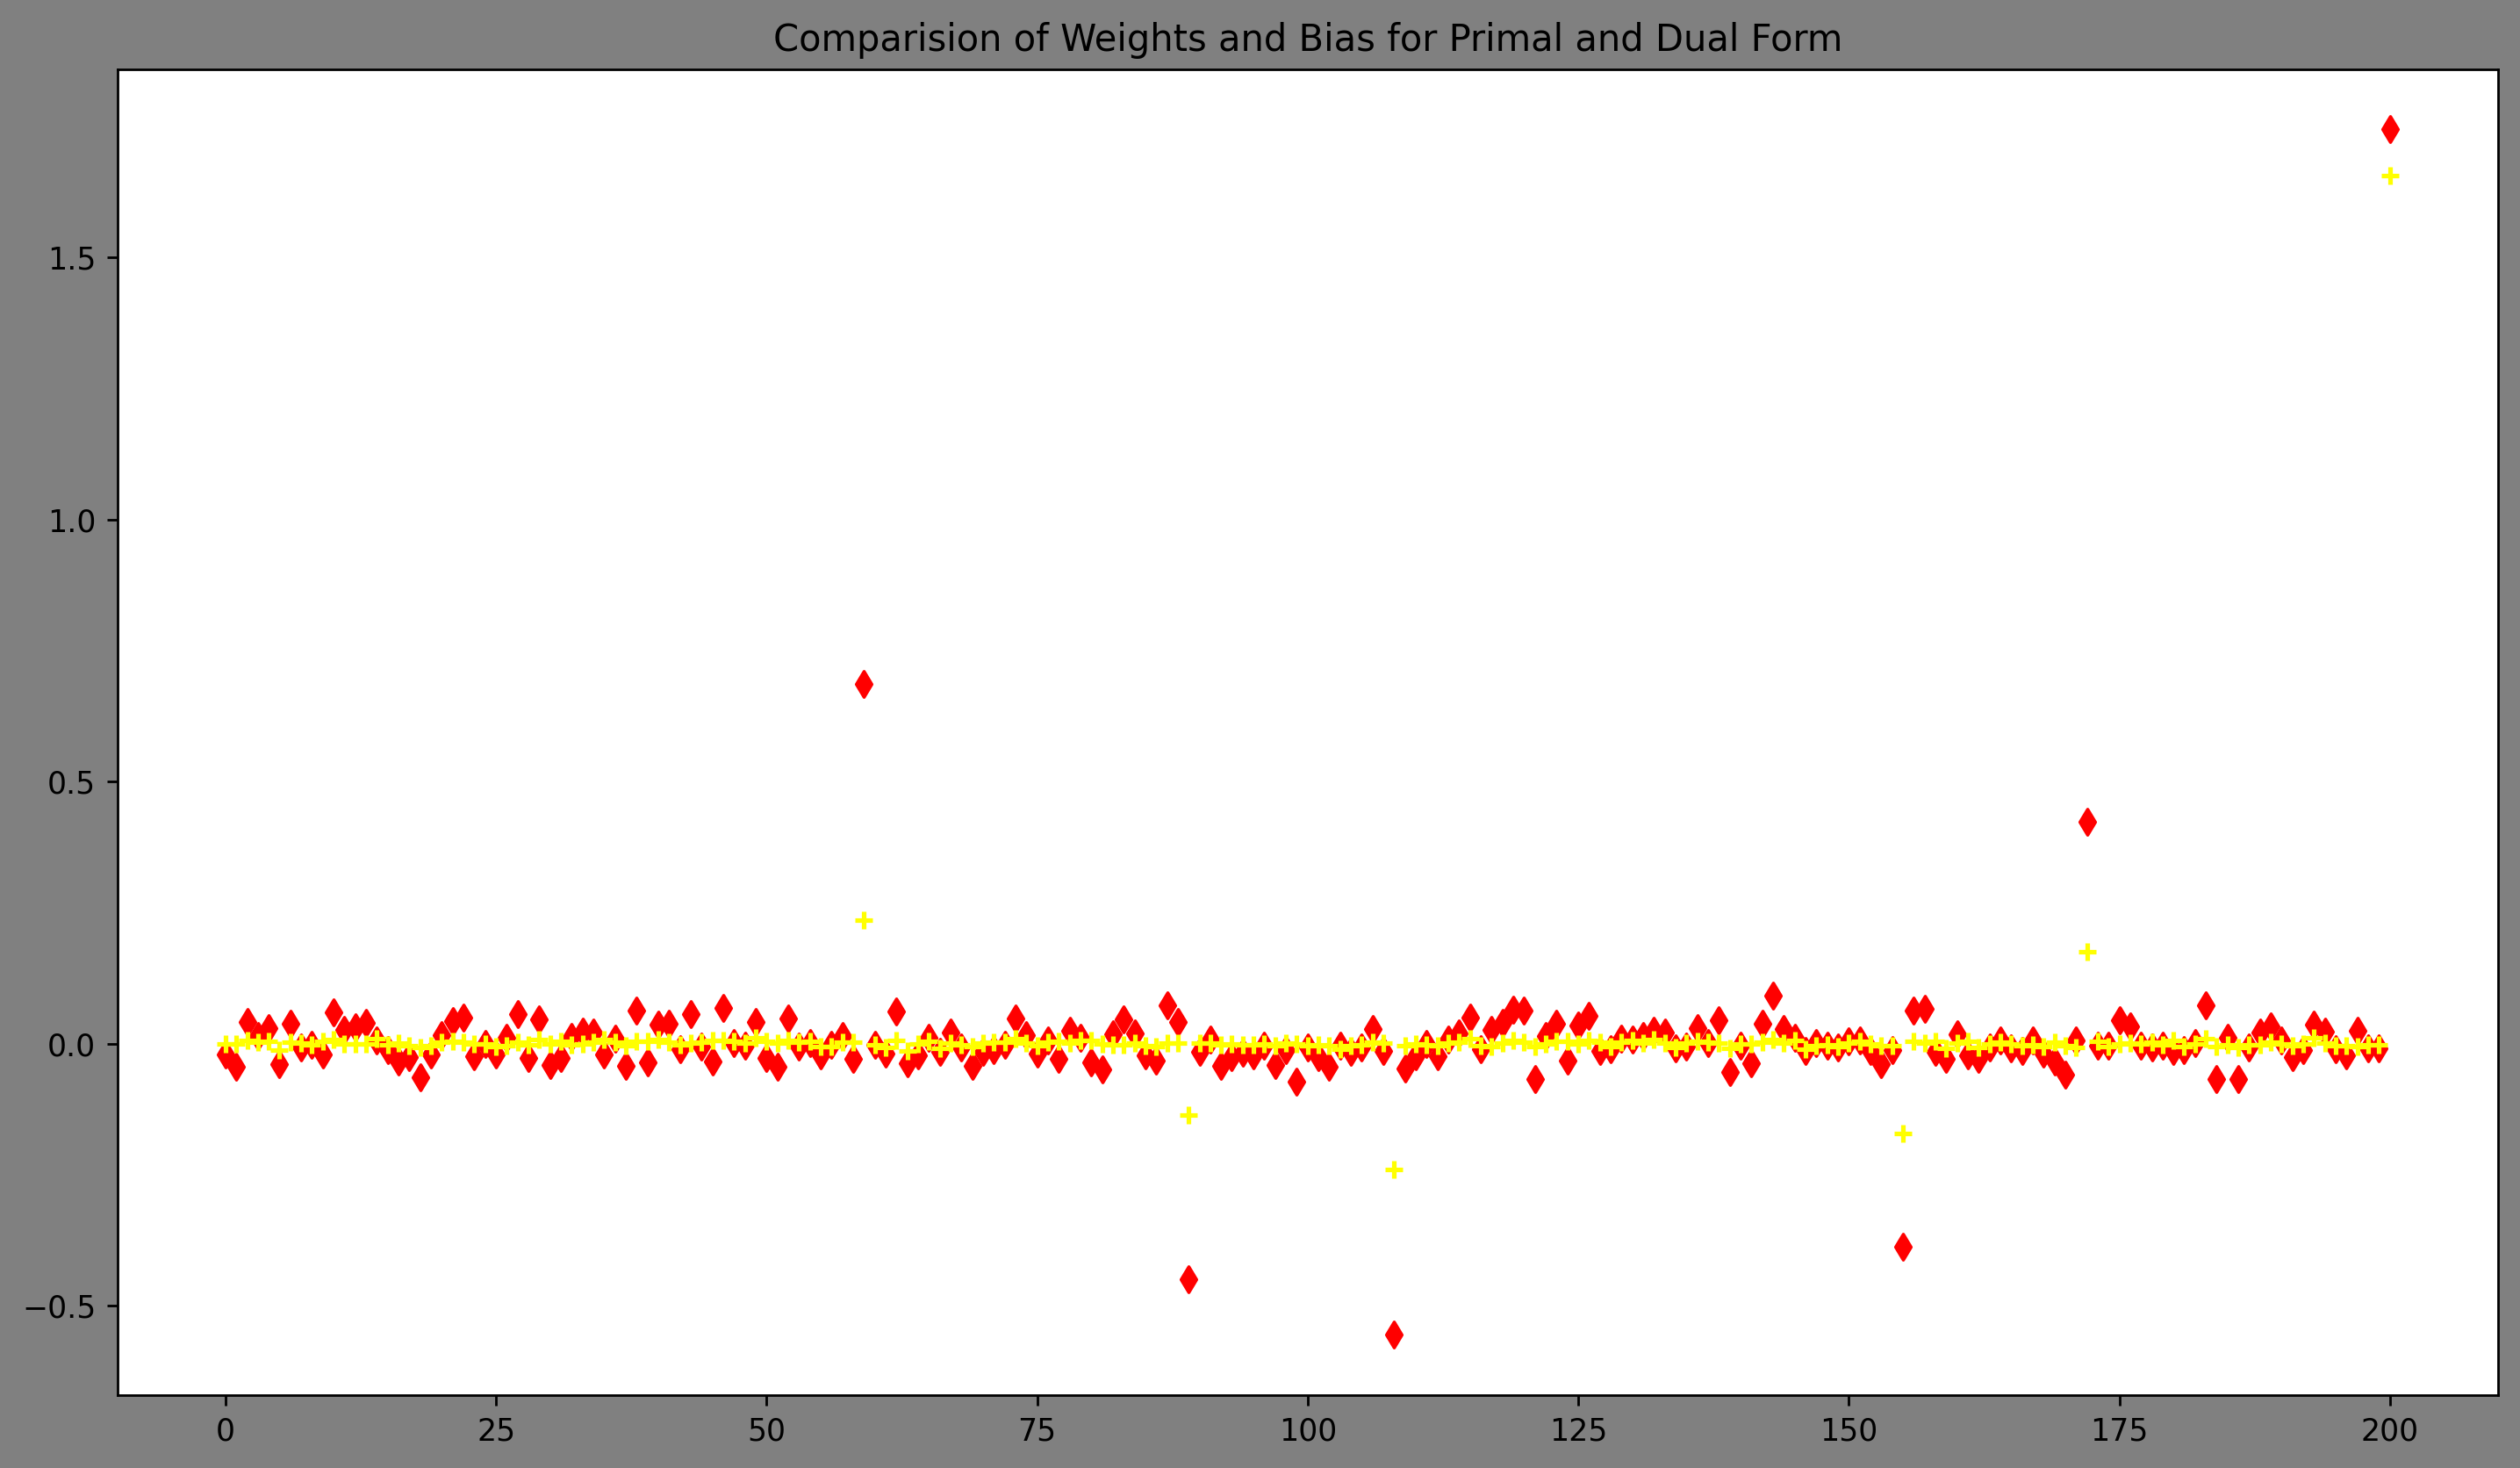

In [27]:
plt.figure(figsize=(14,8), dpi = 250, facecolor = 'gray', edgecolor = 'blue')
plt.scatter(range(0, 201), final_parameter_comparison['SVM Primal Form'], c = 'red', marker = 'd')
plt.scatter(range(0, 201), final_parameter_comparison['SVM Dual Form'], c='yellow', marker = '+')
plt.title('Comparision of Weights and Bias for Primal and Dual Form')